# 卒業研究10：ロジスティック回帰とニューラルネットワークの限界
#### 坂西和也

# データの読み込み


In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# CSVファイルを読み込む
data_path = '/home/taichi/Documents/BANZAI/masuda/'
data = pd.read_csv(data_path + 'EuF3_data.csv' , sep='\t')

In [2]:
data.head()

,Velocity (mm/s),EuF3_w0T7_8S5_85,EuF3_w1T7_8S5_85,EuF3_w2T7_8S5_85,EuF3_w3T7_8S5_85
0,-20.000000,373.275017,89.683715,59.446287,38.924525
1,-19.685039,373.239700,90.317998,59.679393,38.652381
2,-19.370079,373.287540,90.972404,59.770151,38.261999
3,-19.055118,373.344075,91.617714,59.701970,37.806983
4,-18.740157,373.326817,92.212957,59.470467,37.346615


# データの可視化

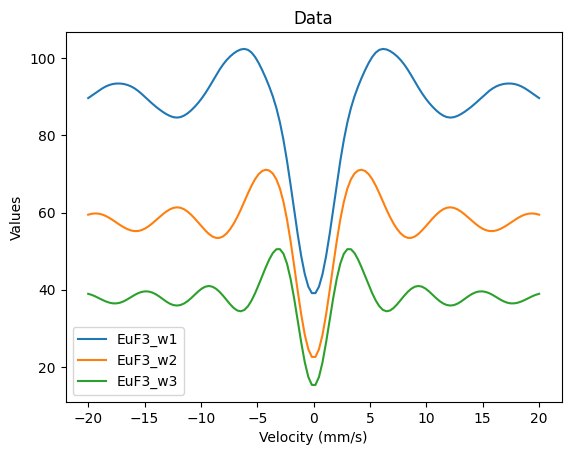

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

# 横軸に1列目のデータを使用
x = data.iloc[:, 0]

# 3列目から5列目のデータをそれぞれプロット
for i in range(2, 5):
    plt.plot(x, data.iloc[:, i], label=f'EuF3_w{i-1}')

# 凡例を追加
plt.legend()

# グラフのタイトルと軸ラベルを設定
plt.title('Data')
plt.xlabel('Velocity (mm/s)')
plt.ylabel('Values')

# グラフを表示
plt.show()

# データの圧縮c倍
データをc倍する．

ここでポイントになるのはデータを c倍に圧縮しても，ノイズの標準偏差は c倍にならないことである．

つまり$Y$を元データに乱数を乗せたデータ，$X$を元データとして$$ Y|X \sim N(X, X) $$と仮定する．

このとき$$\sigma = \sqrt{Var[Y|X]} = \sqrt{X}$$である．

ここで$X\to cX $としたとき$$\sqrt{Var[Y| cX]} = \sqrt{ cX} \simeq \sqrt c \sigma$$となる．

つまり，元データを c倍に圧縮すると，ノイズの標準偏差は約$\sqrt c$倍になり乱数の影響が大きくなってしまう．

実験でも実験時間が短くなると，元データの値が小さくなり，ノイズの影響が大きくなる．


In [4]:
import pandas as pd

# 新しいDataFrame w1 を作成し、元の1列目をコピー
w1 = pd.DataFrame()
w1['Velocity (mm/s)'] = data.iloc[:, 0]

# 3列目のデータに指定された係数を順に掛け、新しい列として挿入
factors = [0.1, 0.09, 0.08, 0.07, 0.06, 0.05, 0.04, 0.03, 0.02, 0.01, \
           0.009, 0.008, 0.007, 0.006, 0.005, 0.004, 0.003, 0.002, 0.001]

for factor in factors:
    w1[f'EuF_w1 * {factor:.3f}'] = data.iloc[:, 2] * factor

# w1 の内容を表示（オプション）
w1.head()


,Velocity (mm/s),EuF_w1 * 0.100,EuF_w1 * 0.090,EuF_w1 * 0.080,EuF_w1 * 0.070,EuF_w1 * 0.060,EuF_w1 * 0.050,EuF_w1 * 0.040,EuF_w1 * 0.030,EuF_w1 * 0.020,EuF_w1 * 0.010,EuF_w1 * 0.009,EuF_w1 * 0.008,EuF_w1 * 0.007,EuF_w1 * 0.006,EuF_w1 * 0.005,EuF_w1 * 0.004,EuF_w1 * 0.003,EuF_w1 * 0.002,EuF_w1 * 0.001
0,-20.000000,8.968372,8.071534,7.174697,6.277860,5.381023,4.484186,3.587349,2.690511,1.793674,0.896837,0.807153,0.717470,0.627786,0.538102,0.448419,0.358735,0.269051,0.179367,0.089684
1,-19.685039,9.031800,8.128620,7.225440,6.322260,5.419080,4.515900,3.612720,2.709540,1.806360,0.903180,0.812862,0.722544,0.632226,0.541908,0.451590,0.361272,0.270954,0.180636,0.090318
2,-19.370079,9.097240,8.187516,7.277792,6.368068,5.458344,4.548620,3.638896,2.729172,1.819448,0.909724,0.818752,0.727779,0.636807,0.545834,0.454862,0.363890,0.272917,0.181945,0.090972
3,-19.055118,9.161771,8.245594,7.329417,6.413240,5.497063,4.580886,3.664709,2.748531,1.832354,0.916177,0.824559,0.732942,0.641324,0.549706,0.458089,0.366471,0.274853,0.183235,0.091618
4,-18.740157,9.221296,8.299166,7.377037,6.454907,5.532777,4.610648,3.688518,2.766389,1.844259,0.922130,0.829917,0.737704,0.645491,0.553278,0.461065,0.368852,0.276639,0.184426,0.092213


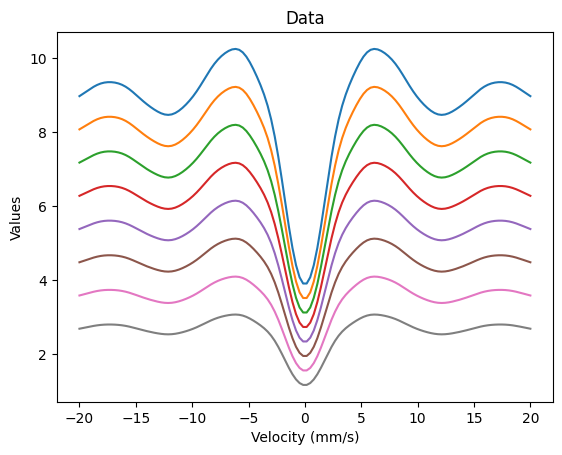

In [5]:
import pandas as pd
import matplotlib.pyplot as plt

# 横軸に1列目のデータを使用
x = data.iloc[:, 0]

# 3列目から5列目のデータをそれぞれプロット
for i in range(1,9):
    plt.plot(x, w1.iloc[:, i], label=f'{i-1}')

# グラフのタイトルと軸ラベルを設定
plt.title('Data')
plt.xlabel('Velocity (mm/s)')
plt.ylabel('Values')

# グラフを表示
plt.show()

# データにノイズ付加

In [6]:
import numpy as np
import random
# 0行目のデータを取得
row_at_zero_index = data.iloc[0]

# データをコピーして新しいデータフレームを作成
w1_noisy = w1.copy()

# カラムのリストを取得factors.type()
columns_to_plot = w1.columns[1:].tolist()

# 各カラムのデータに正規乱数のノイズを追加
for column in columns_to_plot:
    np.random.seed(111)
    # 正規乱数のノイズは、平均0、分散は各x軸のデータのy軸値
    variance = w1[column].values
    noise = np.random.normal(0, np.sqrt(variance))
    w1_noisy[column] = w1[column] + noise

# 変更後のw1 の内容を表示（オプション）
w1_noisy.head()

,Velocity (mm/s),EuF_w1 * 0.100,EuF_w1 * 0.090,EuF_w1 * 0.080,EuF_w1 * 0.070,EuF_w1 * 0.060,EuF_w1 * 0.050,EuF_w1 * 0.040,EuF_w1 * 0.030,EuF_w1 * 0.020,EuF_w1 * 0.010,EuF_w1 * 0.009,EuF_w1 * 0.008,EuF_w1 * 0.007,EuF_w1 * 0.006,EuF_w1 * 0.005,EuF_w1 * 0.004,EuF_w1 * 0.003,EuF_w1 * 0.002,EuF_w1 * 0.001
0,-20.000000,5.572839,4.850249,4.137640,3.436954,2.750855,2.083181,1.439825,0.830702,0.275146,-0.176925,-0.211506,-0.242932,-0.270588,-0.293630,-0.310846,-0.320372,-0.319072,-0.300833,-0.249870
1,-19.685039,10.186792,9.224342,8.258497,7.288596,6.313733,5.332603,4.343201,3.342155,2.322888,1.268421,1.159360,1.049225,0.937808,0.824822,0.709854,0.592271,0.471005,0.343977,0.205817
2,-19.370079,13.611091,12.469731,11.315103,10.144626,8.954758,7.740394,6.493706,5.201510,3.838103,2.337129,2.172907,2.004489,1.831059,1.651497,1.464190,1.266660,1.054739,0.820300,0.542357
3,-19.055118,8.086085,7.225109,6.367294,5.513256,4.663840,3.820261,2.984385,2.159354,1.351293,0.576015,0.501854,0.428692,0.356724,0.286218,0.217558,0.151334,0.088539,0.031110,-0.015951
4,-18.740157,6.829825,6.030418,5.238040,4.454059,3.680352,2.919623,2.176020,1.456526,0.774761,0.165880,0.112475,0.061294,0.012767,-0.032511,-0.073684,-0.109442,-0.137576,-0.153779,-0.146934


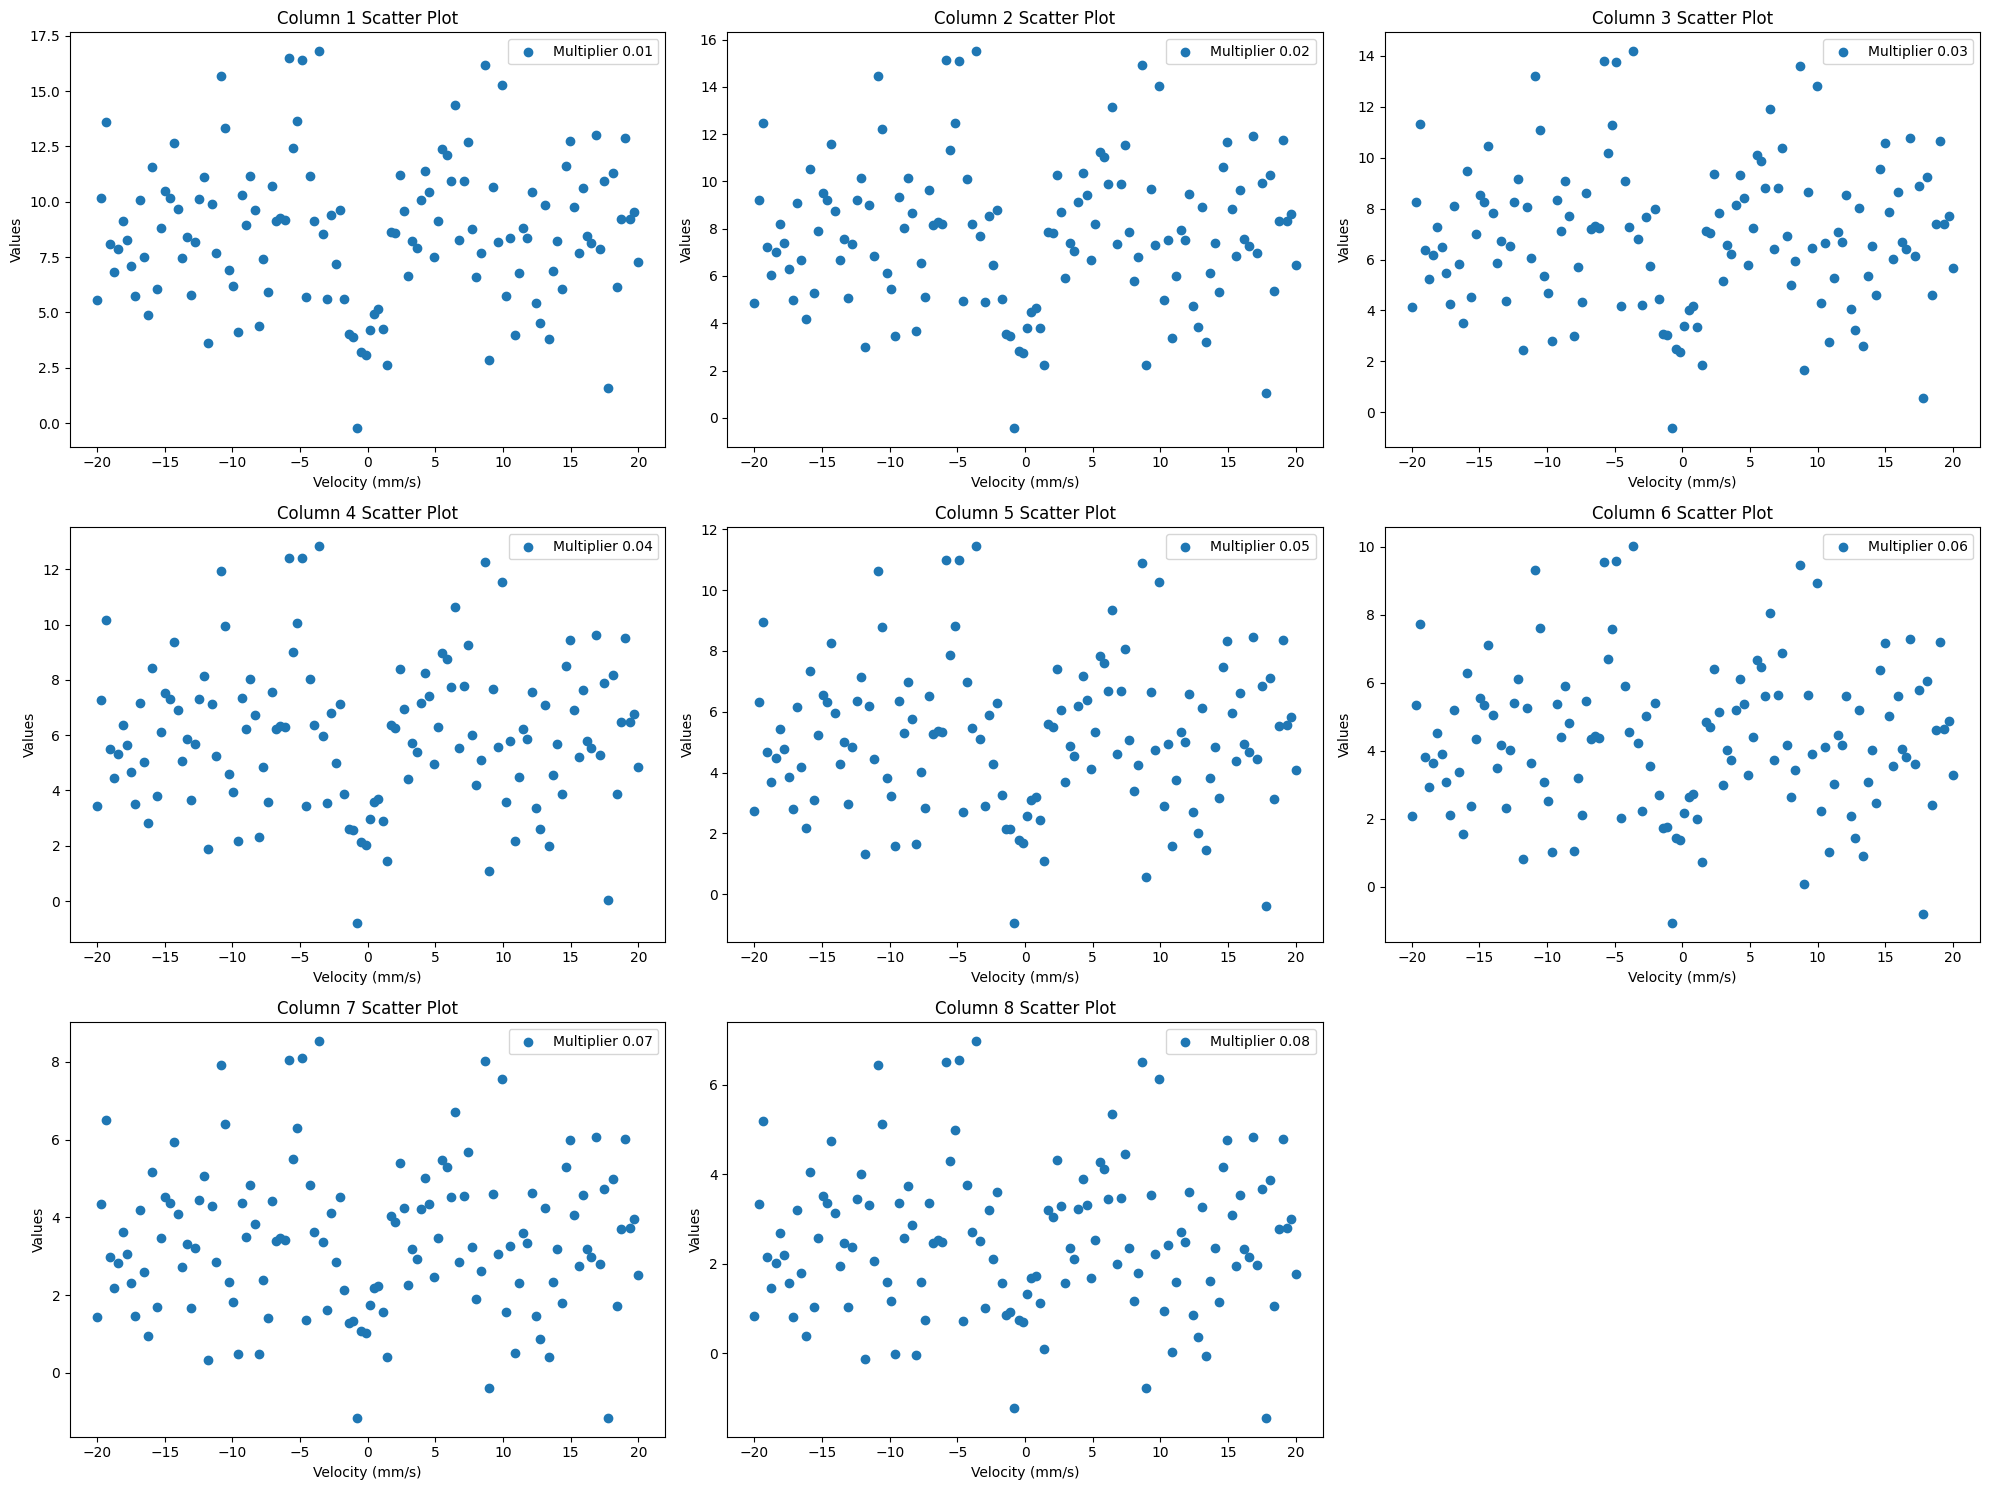

In [7]:
import pandas as pd
import matplotlib.pyplot as plt

# w1のデータを読み込む (あるいは前のステップで生成されたw1を使用)
# w1_noisy = pd.read_csv('path_to_w1.csv')  # 必要に応じてこの行を有効化

# 横軸にw1の1列目のデータを使用
x = w1_noisy.iloc[:, 0]

# 各列を別々の散布図としてプロット
plt.figure(figsize=(20, 15))  # グラフの全体サイズを設定

for i in range(1, 9):
    plt.subplot(3, 3, i)  # 3x3のグリッドで位置を指定
    plt.scatter(x, w1_noisy.iloc[:, i], label=f'Multiplier {i/100:.2f}')
    plt.title(f'Column {i} Scatter Plot')
    plt.xlabel('Velocity (mm/s)')
    plt.ylabel('Values')
    plt.legend()

# グラフを表示
plt.tight_layout()  # サブプロット間のレイアウトを自動調整
plt.show()

# データセットの作成

In [9]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [27]:
import pandas as pd
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score

In [28]:
%%time

# データ数の設定
number = 25
random_number = 25

# 0行目のデータを取得
row_at_zero_index = w1.iloc[0]

# カラムのリストを取得
columns_to_plot = w1.columns[1:].tolist()

# 教師信号を作成
y = [1]*number + [0]*random_number

Log = pd.DataFrame()
NN = pd.DataFrame()
# ニューラルネットワーク用のハイパーパラメータ範囲を設定
param_dist = {
    'hidden_layer_sizes': [(50,), (100,), (50, 50), (100, 50)],
    'alpha': [0.0001, 0.001, 0.01, 0.1, 1],
    'learning_rate_init': [0.001, 0.01, 0.1],
    # 他に最適化したいパラメータを追加
}

# 各カラムごとに
for column in columns_to_plot:
    dataset = pd.DataFrame()
    # 元データからノイズを付加したデータを作成
    for i in range(number):
        np.random.seed(i)
        column_name = f'noisy_{i}'
        # 正規乱数のノイズは、平均0、分散は各x軸のデータのy軸値
        variance = w1[column].values
        noise = np.random.normal(0, np.sqrt(variance))
        dataset[column_name] = w1[column] + noise
    
    # 乱数のみのデータを作成
    for i in range(random_number):
        j = i + number
        np.random.seed(j)
        column_name = f'random_{i}'
        # 正規乱数のノイズは、平均は0行目のデータの値、分散も0行目のデータの値
        noise = np.random.normal(row_at_zero_index[column], np.sqrt(row_at_zero_index[column]),\
                                  size=w1[column].shape)
        dataset[column_name] = noise

    # 入力データとして、各カラムを1つのサンプルとする
    X = dataset
    # データセットをトレーニングセットとテストセットに分割
    X_train, X_test, y_train, y_test = train_test_split(X.T, y, test_size=0.3, random_state=111)

    # ロジスティック回帰モデルを訓練
    clf = LogisticRegression(max_iter=10000)
    clf.fit(X_train, y_train)
    # テストデータを使って予測
    y_pred = clf.predict(X_test)
    # 評価
    Log[column] = [clf.score(X_test, y_test)]

    # ニューラルネットワークのランダムサーチ
    mlp = MLPClassifier(max_iter=1000, random_state=111)
    random_search = RandomizedSearchCV(mlp, param_distributions=param_dist, n_iter=10, cv=5, random_state=111)
    random_search.fit(X_train, y_train)

    # 最適なパラメータでのモデルの評価
    best_mlp = random_search.best_estimator_
    y_pred = best_mlp.predict(X_test)
    NN[column] = [accuracy_score(y_test, y_pred)]


CPU times: user 3min 52s, sys: 5.21 s, total: 3min 57s
Wall time: 41.9 s


In [31]:
# factors リストを DataFrame に変換
factors_df = pd.DataFrame({'Factors': factors})
# インデックスをリセット
factors_df.reset_index(drop=True, inplace=True)
Log_reset = Log.T.reset_index(drop=True)
NN_reset = NN.T.reset_index(drop=True)

# インデックスをリセットしたDataFrameを結合
result_df = pd.concat([factors_df, Log_reset, NN_reset], axis=1)

result_df = pd.concat([factors_df, Log_reset, NN_reset], axis=1)
result_df.columns = ['Factors', 'Log', 'NN']

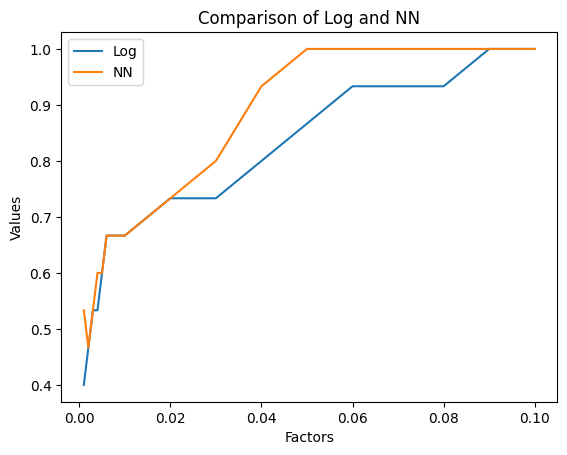

In [30]:
import matplotlib.pyplot as plt

# Factors を横軸に設定
x = result_df['Factors']

# Log と NN を重ねてプロット
plt.plot(x, result_df['Log'], label='Log')
plt.plot(x, result_df['NN'], label='NN')

# 凡例を追加
plt.legend()

# グラフのタイトルと軸ラベルを設定
plt.title('Comparison of Log and NN')
plt.xlabel('Factors')
plt.ylabel('Values')

# グラフを表示
plt.show()